## Load in the data set (Netflix)

In [1]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv("netflix_titles.csv") #loading in the dataset
netflix.head() #viewing the first five row of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check for missing values

In [3]:
netflix.isna().sum()  #checking for missing values by using the isna method and sum method

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Check for an overview of the data

In [4]:
netflix.info()  #this is used to checkthe information on the data which includes the datatype, the non null count etc...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.shape   #used to check the number of rows and columns in a dataset

(8807, 12)

In [6]:
netflix.describe()  #used to generate the descriptive statistics of the quantitative columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Drop the few null rows in Date added, rating and duration columns respectively

In [7]:
netflix.dropna(subset = ["date_added", "rating", "duration"], inplace = True)  #this is used to drop null rowsin a column by subsetting the column names
netflix.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

## Fill in the null rows in director, cast and country column with (“None Specified”, “Non listed” and “Non Specified “) respectively

In [8]:
netflix.fillna({"director": "None specified", "cast": "Non listed", "country": "Non specified"}, inplace = True) #this is used to fill the empty rows in the columns with the specified words that were give. 
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Recheck for missing values

In [9]:
netflix.isna().sum() #I rechecked for missing values, and we have none becaues it has all been filled and dropped.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check the value count for Duration column

In [10]:
netflix["duration"].value_counts().sum() #I used the value counts method and the sum method to find the total number of durations used altogether


8790

## Check the value count for type column

In [11]:
netflix["type"].value_counts().sum()

8790

## Using pie chart in matplotlib visualize the type column (Movie and TV Show)

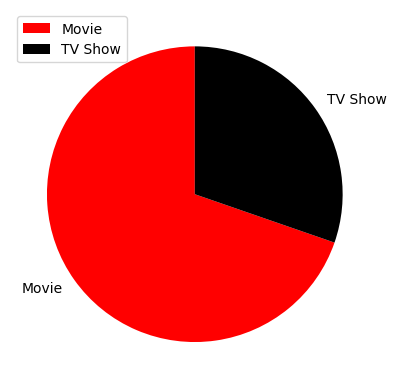

In [12]:
plt.pie(netflix["type"].value_counts(), 
        labels = netflix["type"].value_counts().index,
        colors = ["red","black"], startangle =90)
plt.legend()
plt.show()

## Subset the data to only include Movies in the type Column

In [13]:
netflix_movie = netflix[netflix["type"] == "Movie"]
netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Non listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


## Get the counts of directors in the dataset

In [14]:
netflix["director"].value_counts()

None specified                    2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

## Visualize the top movies directors

In [15]:
movie_dir= netflix_movie['director'].str.split(',', expand=True).stack()
movie_dir = pd.DataFrame(movie_dir)
movie_dir.head()

0
0 0  Kirsten Johnson
6 0    Robert Cullen
  1   José Luis Ucha
7 0     Haile Gerima
9 0   Theodore Melfi

In [18]:
movie_dir.columns = ["Directors"]
movie_dir

Directors
0    0  Kirsten Johnson
6    0    Robert Cullen
     1   José Luis Ucha
7    0     Haile Gerima
9    0   Theodore Melfi
...                 ...
8801 0  Majid Al Ansari
8802 0    David Fincher
8804 0  Ruben Fleischer
8805 0     Peter Hewitt
8806 0      Mozez Singh

[6849 rows x 1 columns]

In [19]:
movie_dir = movie_dir[movie_dir["Directors"] != "None specified"]
movie_dir = movie_dir.groupby(['Directors']).size().reset_index(name='Total Movies')

In [20]:
top_directors = pd.DataFrame(movie_dir.sort_values(by=['Total Movies'], ascending=False)).head(10)
top_directors

,Directors,Total Movies
3816,Rajiv Chilaka,22
3863,Raúl Campos,18
234,Jan Suter,18
4427,Suhas Kadav,16
2307,Jay Karas,15
3065,Marcus Raboy,15
1288,Cathy Garcia-Molina,13
2304,Jay Chapman,12
4838,Youssef Chahine,12
3133,Martin Scorsese,12


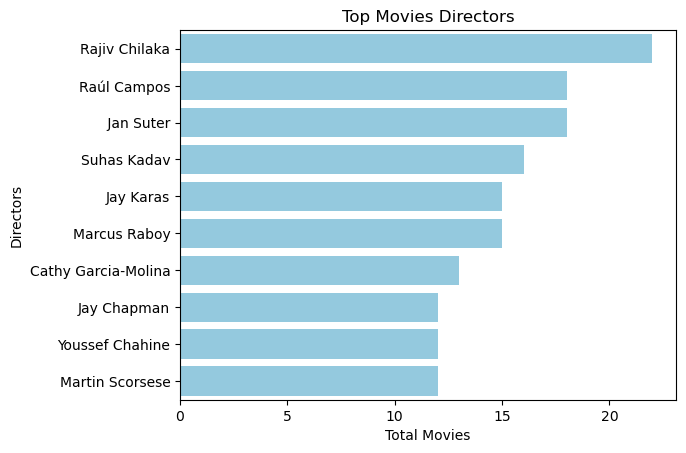

In [21]:
sns.barplot(data = top_directors, x = "Total Movies", y = "Directors", color = "skyblue")
plt.title("Top Movies Directors")
plt.show()

## What are the top countries by movies counts

In [68]:
movie_country = netflix_movie["country"].str.split(",", expand= True).stack()
movie_country = movie_country.str.strip(" ")


In [69]:
movie_country.value_counts()

United States     2749
India              962
United Kingdom     534
Non specified      439
Canada             319
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Length: 119, dtype: int64

## Visualize the top countries by movie count

In [55]:
top_movie_country = movie_country.value_counts().head(10)
top_movie_country

United States     2749
India              962
United Kingdom     534
Non specified      439
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
dtype: int64

In [56]:
top_movie_country = pd.DataFrame(top_movie_country)
top_movie_country.columns = ["Movie Counts"]
top_movie_country

,Movie Counts
United States,2749
India,962
United Kingdom,534
Non specified,439
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


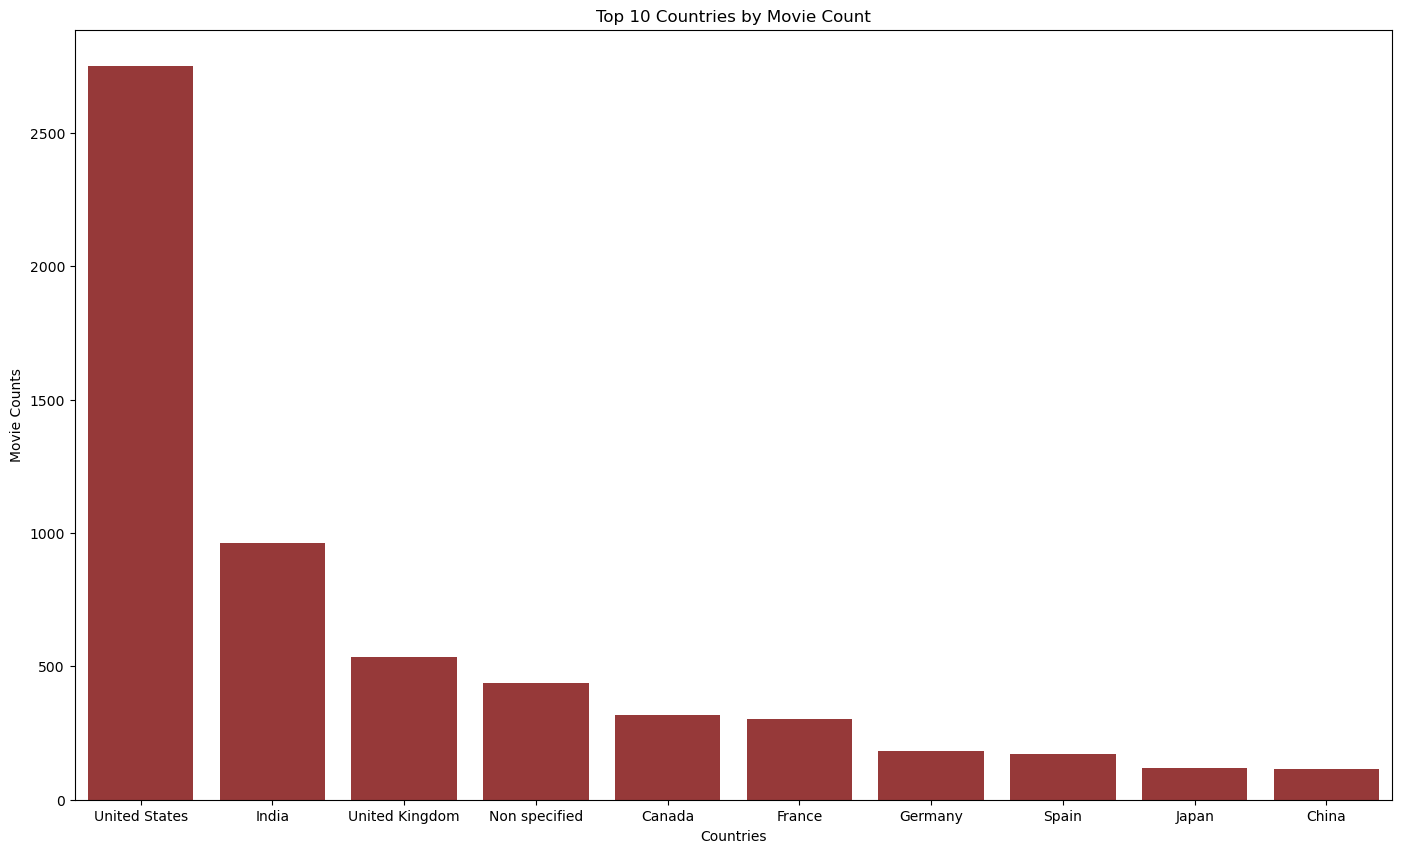

In [57]:
plt.figure(figsize = (17,10))
sns.barplot(x = top_movie_country.index, y = top_movie_country["Movie Counts"], data = top_movie_country,color = "brown")
plt.title("Top 10 Countries by Movie Count")
plt.xlabel("Countries");

##  Select movies type that are been released in the last 10 year (where years >=2012)

In [58]:
last_10_years_movie = netflix_movie[netflix_movie["release_year"] >= 2012]
last_10_years_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Non listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Non specified,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


## Using bar plot, show the count of movies and series produced in the last 10 years (where years >= 2012)

In [63]:
netflix["release_year"].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [69]:
release = netflix[["type", "release_year"]]
last_10_years = release[netflix["release_year"] >= 2012]
last_10_years

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8798,Movie,2014
8800,TV Show,2012
8801,Movie,2015
8803,TV Show,2018


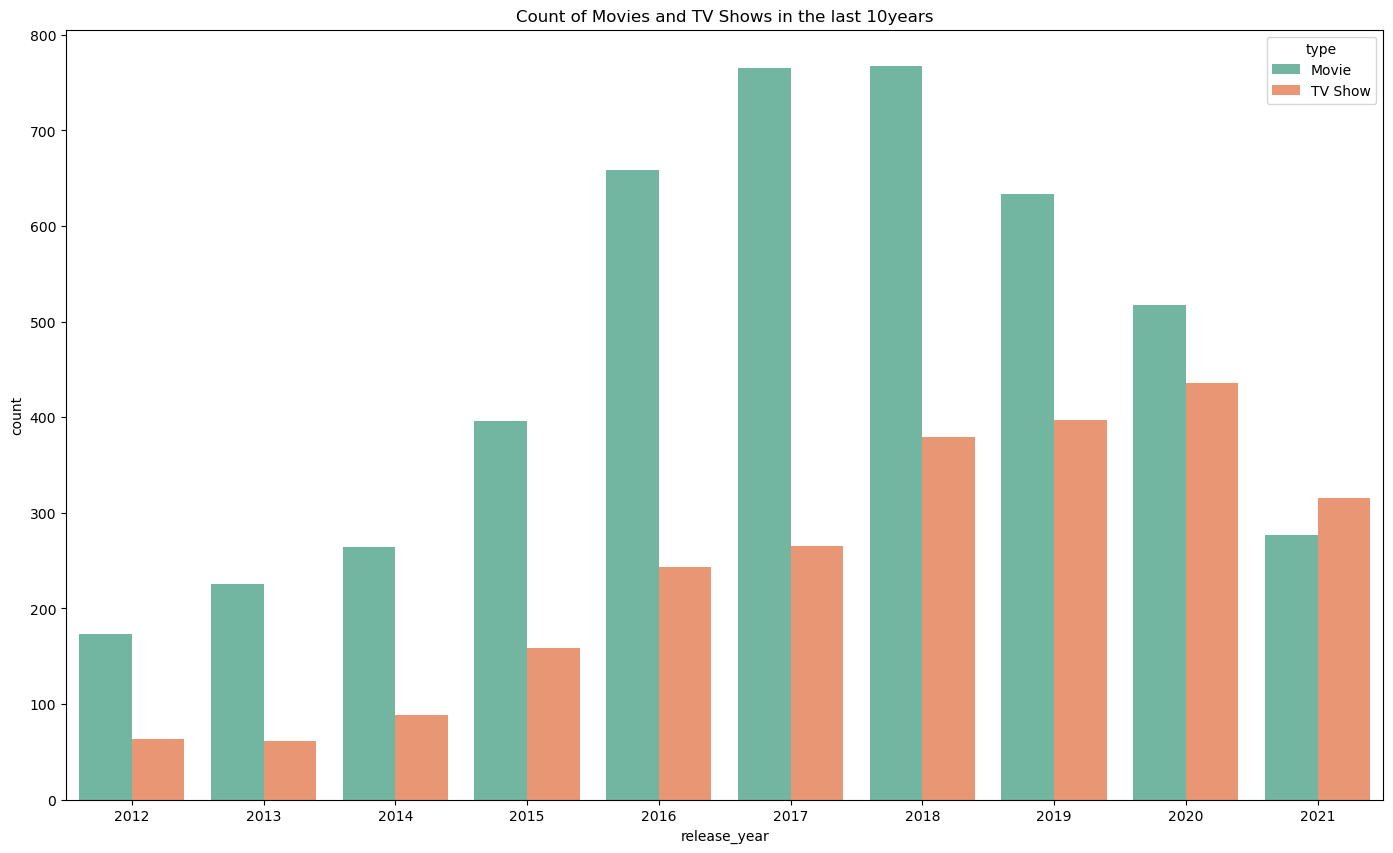

In [85]:
plt.figure(figsize= (17,10))
sns.countplot(x =last_10_years['release_year'] ,data= release, hue = "type", palette = "Set2")
plt.title("Count of Movies and TV Shows in the last 10years")
plt.show()

In [86]:
18) Using a count plot show the total movies and TV show been released in the last 10 years

SyntaxError: unmatched ')' (2525947108.py, line 1)

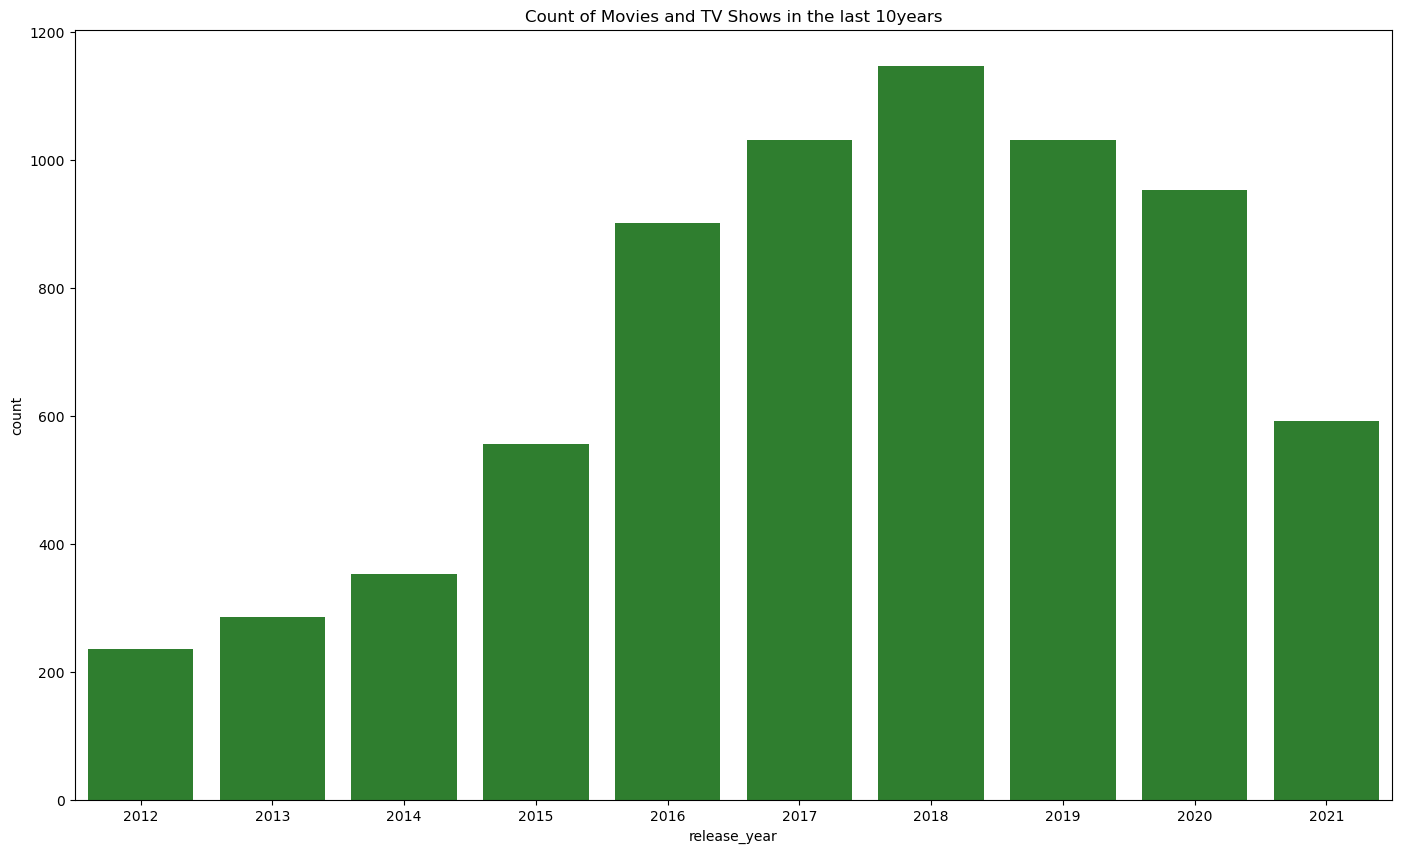

In [93]:
plt.figure(figsize= (17,10))
sns.countplot(x =last_10_years['release_year'] ,data= release , color= "forestgreen")
plt.title("Count of Movies and TV Shows in the last 10years")
plt.show()

##  Check for unique rating

In [95]:
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)